In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import random, scipy.spatial, math
from tqdm import tqdm

In [78]:
def model(pt_count, radius, grid_size, dim):
    center = np.random.rand(dim)
    cells_x = np.linspace(0, 1, grid_size, endpoint=False) + 1 / grid_size / 2
    if dim == 2:
        cells = np.array([(x, y) for x in cells_x for y in cells_x])
    elif dim == 3:
        cells = np.array([(x, y, z) for x in cells_x for y in cells_x for z in cells_x])        
    cells_counts = [0 for i in range(len(cells))]
    for _ in range(pt_count):
        cells_counts[random.randint(0, len(cells) - 1)] += 1
    max_count = max(cells_counts)
    radius += 1 / math.sqrt(2) / grid_size
    selected = np.sum((cells - center) ** 2, axis=1) < radius ** 2
    return max_count * sum(selected)

In [383]:
def model2(pt_count, radius, grid_size, dim):
    center = np.random.rand(dim)
    cells_x = np.linspace(0, 1, grid_size, endpoint=False) + 1 / grid_size / 2
    if dim == 2:
        cells = np.array([(x, y) for x in cells_x for y in cells_x])
    elif dim == 3:
        cells = np.array([(x, y, z) for x in cells_x for y in cells_x for z in cells_x])        
    cells_counts = [0 for i in range(len(cells))]
    for _ in range(pt_count):
        cells_counts[random.randint(0, len(cells) - 1)] += 1
    max_count = max(cells_counts)
    selected = np.max(np.abs(cells - center), axis=1) < radius + 1 / grid_size / 2
    return max_count * sum(selected)

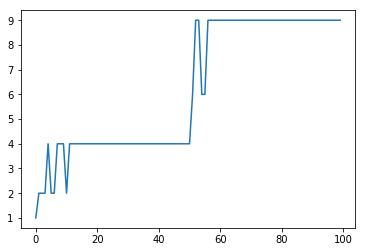

In [405]:
rr = [i / 1000 for i in range(100)]
plt.plot([get_selected(r, 10, 2) for r in rr]);
# plt.plot([get_max_count(r, 10, 2) for r in rr]);

In [130]:
get_max_count(100, 1000)

20

In [402]:
get_selected(0.05, 10, 2)

4

In [387]:
def get_selected(radius, grid_size, dim):
    cells_x = np.linspace(0, 1, grid_size, endpoint=False) + 1 / grid_size / 2
    if dim == 2:
        cells = np.array([(x, y) for x in cells_x for y in cells_x])
    elif dim == 3:
        cells = np.array([(x, y, z) for x in cells_x for y in cells_x for z in cells_x])
    res = 0
    for i in range(100):
        center = np.random.rand(dim)
        selected = np.sum(np.max(np.abs(cells - center), axis=1) < radius + 1 / grid_size / 2)
        res = max(res, selected)
    return res

def get_max_count(cells, count):
    cells_counts = [0 for i in range(cells)]
    for _ in range(count):
        cells_counts[random.randint(0, cells - 1)] += 1
    return max(cells_counts)

In [4]:
# results = {}

In [32]:
# results1000 = {}

In [43]:
# results10000 = {}

In [59]:
# results20000 = {}

In [76]:
# results3_5000 = {}

In [87]:
radius = 100
count = 1000
iters = 10
for radius in tqdm([40, 60, 80, 100]):
    res_grid_size = []
    res_count = []
    for grid_size in tqdm(np.linspace(1 / 8, 1 / 2, 5)):
        mean = 0
        res_grid_size.append(grid_size)
        for _ in range(iters):
            mean += model(count, 1 / radius, int(grid_size * radius), 3)
        res_count.append(mean / iters)
    results3_5000[radius] = (res_grid_size, res_count)



  0%|          | 0/4 [00:00<?, ?it/s]


  0%|          | 0/5 [00:00<?, ?it/s]


 40%|████      | 2/5 [00:00<00:00, 16.29it/s]


 60%|██████    | 3/5 [00:00<00:00, 11.29it/s]


 80%|████████  | 4/5 [00:00<00:00,  7.47it/s]


100%|██████████| 5/5 [00:01<00:00,  4.92it/s]




 25%|██▌       | 1/4 [00:01<00:03,  1.04s/it]


  0%|          | 0/5 [00:00<?, ?it/s]


 40%|████      | 2/5 [00:00<00:00,  8.99it/s]


 60%|██████    | 3/5 [00:00<00:00,  5.09it/s]


 80%|████████  | 4/5 [00:01<00:00,  2.89it/s]


100%|██████████| 5/5 [00:02<00:00,  1.76it/s]




 50%|█████     | 2/4 [00:03<00:03,  1.95s/it]


  0%|          | 0/5 [00:00<?, ?it/s]


 40%|████      | 2/5 [00:00<00:00,  5.14it/s]


 60%|██████    | 3/5 [00:01<00:00,  2.41it/s]


 80%|████████  | 4/5 [00:03<00:00,  1.29it/s]


100%|██████████| 5/5 [00:06<00:00,  1.36s/it]




 75%|███████▌  | 3/4 [00:10<00:03,  3.58s/it]


  0%|          | 0/5 [00:00<?, ?it/s]


 20%|██        | 1/5 [00:00<00:00,  6.65it/s]


 40%|████      | 2/5 [00

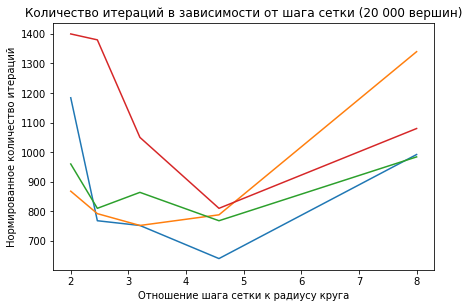

In [102]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.title('Количество итераций в зависимости от шага сетки (20 000 вершин)')
plt.xlabel('Отношение шага сетки к радиусу круга')
plt.ylabel('Нормированное количество итераций')
for radius in results3_5000:
    res_grid_size, res_count = results3_5000[radius]
    plt.plot([1 / x for x in res_grid_size], [x * radius for x in res_count]);

In [337]:
raise
results1000 = {}
results5000 = {}
results10000 = {}
results20000 = {}

dict_keys([100, 90, 80, 70, 60, 50, 10, 20, 30, 40])

In [384]:
results500 = {}
results2000 = {}

In [406]:
count = 500
iters = 10
for radius in tqdm([20, 30, 40, 50]):
    res_grid_size = []
    res_count = []
    for grid_size in tqdm(np.linspace(1 / 4, 3, 20)):
        mean = 0
        res_grid_size.append(grid_size)
        for _ in range(iters):
            mean += model2(count, 1 / radius, int(grid_size * radius), 2)
        res_count.append(mean / iters)
    results500[radius] = (res_grid_size, res_count)




  0%|          | 0/4 [00:00<?, ?it/s]



  0%|          | 0/20 [00:00<?, ?it/s]



 25%|██▌       | 5/20 [00:00<00:00, 38.81it/s]



 40%|████      | 8/20 [00:00<00:00, 29.69it/s]



 50%|█████     | 10/20 [00:00<00:00, 24.95it/s]



 60%|██████    | 12/20 [00:00<00:00, 21.35it/s]



 70%|███████   | 14/20 [00:00<00:00, 18.25it/s]



 80%|████████  | 16/20 [00:01<00:00, 15.68it/s]



 90%|█████████ | 18/20 [00:01<00:00, 13.41it/s]



 95%|█████████▌| 19/20 [00:01<00:00, 12.30it/s]



100%|██████████| 20/20 [00:01<00:00, 11.35it/s]






 25%|██▌       | 1/4 [00:01<00:05,  1.78s/it]



  0%|          | 0/20 [00:00<?, ?it/s]



 20%|██        | 4/20 [00:00<00:00, 34.59it/s]



 30%|███       | 6/20 [00:00<00:00, 26.41it/s]



 40%|████      | 8/20 [00:00<00:00, 19.66it/s]



 50%|█████     | 10/20 [00:00<00:00, 15.54it/s]



 60%|██████    | 12/20 [00:00<00:00, 12.44it/s]



 65%|██████▌   | 13/20 [00:01<00:00, 11.11it/s]



 70%|███████   | 14/20 [00:01<00:00, 10.00it/s]



 75%|████

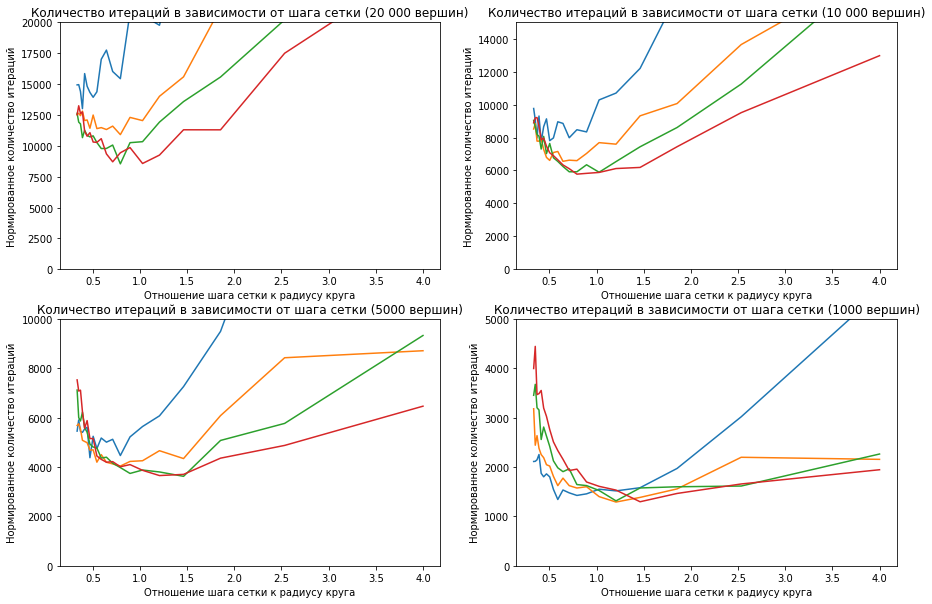

In [366]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.title('Количество итераций в зависимости от шага сетки (20 000 вершин)')
plt.xlabel('Отношение шага сетки к радиусу круга')
plt.ylabel('Нормированное количество итераций')
plt.ylim(0, 20000)
for radius in results20000:
    res_grid_size, res_count = results20000[radius]
    plt.plot([1 / x for x in res_grid_size], [x * radius for x in res_count]);

plt.subplot(222)
plt.title('Количество итераций в зависимости от шага сетки (10 000 вершин)')
plt.xlabel('Отношение шага сетки к радиусу круга')
plt.ylabel('Нормированное количество итераций')
plt.ylim(0, 15000)
for radius in results10000:
    res_grid_size, res_count = results10000[radius]
    plt.plot([1 / x for x in res_grid_size], [x * radius for x in res_count]);

plt.subplot(223)
plt.title('Количество итераций в зависимости от шага сетки (5000 вершин)')
plt.xlabel('Отношение шага сетки к радиусу круга')
plt.ylabel('Нормированное количество итераций')
plt.ylim(0, 10000)
for radius in results5000:
    res_grid_size, res_count = results5000[radius]
    plt.plot([1 / x for x in res_grid_size], [x * radius for x in res_count]);

plt.subplot(224)
plt.title('Количество итераций в зависимости от шага сетки (1000 вершин)')
plt.xlabel('Отношение шага сетки к радиусу круга')
plt.ylabel('Нормированное количество итераций')
plt.ylim(0, 5000)
for radius in results1000:
    res_grid_size, res_count = results1000[radius]
    plt.plot([1 / x for x in res_grid_size], [x * radius for x in res_count]);

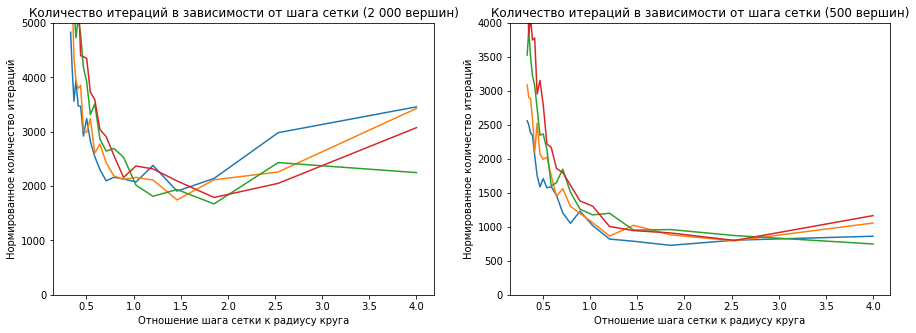

In [407]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Количество итераций в зависимости от шага сетки (2 000 вершин)')
plt.xlabel('Отношение шага сетки к радиусу круга')
plt.ylabel('Нормированное количество итераций')
plt.ylim(0, 5000)
for radius in results2000:
    res_grid_size, res_count = results2000[radius]
    plt.plot([1 / x for x in res_grid_size], [x * radius for x in res_count]);

plt.subplot(122)
plt.title('Количество итераций в зависимости от шага сетки (500 вершин)')
plt.xlabel('Отношение шага сетки к радиусу круга')
plt.ylabel('Нормированное количество итераций')
plt.ylim(0, 4000)
for radius in results500:
    res_grid_size, res_count = results500[radius]
    plt.plot([1 / x for x in res_grid_size], [x * radius for x in res_count]);